<a href="https://colab.research.google.com/github/na-go/Prac_PyTorch/blob/master/Prac_Pytorch_Sec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Google Driveにマウント
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Colab Notebooks/prac_Putorch

/content/gdrive/My Drive/Colab Notebooks/prac_Putorch


In [0]:
# モジュールのインポート
import torch.tensor as tensor
import torch.nn as nn
import torch

In [0]:
# Tensorの積
## vector同士の内積
x1 = torch.arange(4)
x2 = torch.arange(4)
print("'dot x1 and x2':\n",torch.dot(x1,x2))

## vector と array の積
X1 = torch.arange(8).view(2,4)
print("'mv X1 and x2':\n", torch.mv(X1,x2))

## array同士の積
X2 = torch.arange(8).view(2,4).T
print("'mm X1 and X2':\n", torch.mm(X1,X2))

## Batchごとの行列積
Y1 = torch.arange(24).view(-1,2,4)
Y2 = torch.arange(24).view(-1,4,2)
print("Y1 :\n",Y1)
print("Y2 :\n",Y2)
print("bmm Y1 and Y2 :\n", torch.bmm(Y1,Y2))

'dot x1 and x2':
 tensor(14)
'mv X1 and x2':
 tensor([14, 38])
'mm X1 and X2':
 tensor([[ 14,  38],
        [ 38, 126]])
Y1 :
 tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
Y2 :
 tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])
bmm Y1 and Y2 :
 tensor([[[  28,   34],
         [  76,   98]],

        [[ 428,  466],
         [ 604,  658]],

        [[1340, 1410],
         [1644, 1730]]])


In [0]:
# ネットワーク定義
## Sequentialの例1
sequential_model1 = nn.Sequential(
    nn.Conv2d(1,20,5),
    nn.ReLU(),
    nn.Conv2d(20,54,5),
    nn.ReLU()
)
print("sequential_model1 : \n",sequential_model1)

## Sequentialの例2
sequential_model2 = nn.Sequential()
sequential_model2.add_module("conv1", nn.Conv2d(1,20,5))
sequential_model2.add_module("relu1", nn.ReLU())
sequential_model2.add_module("conv2", nn.Conv2d(20,64,5))
sequential_model2.add_module("relu2", nn.ReLU())
print("sequential_model2 : \n", sequential_model2)


sequential_model1 : 
 Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 54, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)
sequential_model2 : 
 Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)


In [0]:
## nn.Moduleを継承した例
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1,20,5)
    self.conv2 = nn.Conv2d(20,64,5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    return F.relu(self.conv2(x))

model = Model()

print(model)

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
)


In [0]:
## nn.ModuelListを使った書き方
class ModelwithList(nn.Module):
  def __init__(self):
    super(ModelwithList, self).__init__()
    self.convs = nn.ModuleList([nn.Conv2d(1, 20, 5), nn.Conv2d(20, 64, 5)])

  def forward(self, x):
    for l in self.convs:
      x = l(x)
    return x
  
modelwithlist = ModelwithList()

print(modelwithlist)

  

ModelwithList(
  (convs): ModuleList(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  )
)


In [0]:
## nn.ModuleDictを使った書き方
class ModelwithDict(nn.Module):

  def __init__(self):
    super(ModelwithDict, self).__init__()
    self.convs = nn.ModuleDict({"conv1" : nn.Conv2d(1, 20, 5), "conv2" : nn.Conv2d(20, 64, 5)})

  def forward(self, x):
    for i in self.convs.values():
      x = l(x)
    return x

modelwithdict = ModelwithDict()

print(modelwithdict)

ModelwithDict(
  (convs): ModuleDict(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  )
)


In [0]:
# 自動微分機能
## Tensorを作る
x = torch.tensor(1, requires_grad = True, dtype = torch.float32)
w = torch.tensor(2, requires_grad = True, dtype = torch.float32)
b = torch.tensor(3, requires_grad = True, dtype = torch.float32)

## 計算グラフを作成する
y = w * x + b
## Tensorの確認
print(y)

## 勾配計算
print(y.backward())

## 勾配を確認
print(x.grad)
print(w.grad)
print(b.grad)

tensor(5., grad_fn=<AddBackward0>)
None
tensor(2.)
tensor(1.)
tensor(1.)


In [0]:
# ネットワークパラメータの凍結
## モジュールのインポート
import torchvision

## vgg16を持ってくる
vgg16 = torchvision.models.vgg16(pretrained = True)
for param in vgg16.features.parameters():
  param.requires_grad = False

In [0]:
# GPUの使用
## Tensorにgpuを使用
xf_gpu = torch.FloatTensor(1,2).to("cuda")
## ネットワークにgpuを使用
net = Model()
net.to("cuda")

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
)

In [0]:
# 損失関数と最適化関数を使って実際に学習
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline
## 簡単なニューラルネットを作成
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.liner1 = nn.Linear(in_features=10, out_features=10, bias = False)

  def forward(self, x):
    x = self.liner1(x)
    return x


In [0]:
## main関数の作成
def main(opt_conf):
  loss_list = []
  ## データ作成
  x = torch.randn(2, 10)
  w = torch.randn(1,1)
  y = torch.mul(w,x) + 2
  ## ネットワーク定義
  net = Net()

  ## 損失関数
  criterion = nn.MSELoss()
  ## 最適化関数
  if opt_conf == "sgd":
    optimizer = optim.SGD(net.parameters(), lr = 0.1)
  elif opt_conf == "momentum_sgd":
    optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.9)
  elif opt_conf == "adadelta":
    optimizer = optim.Adadelta(net.parameters(), rho = 0.95, eps = 1e-04)
  elif opt_conf == "adagrad":
    optimizer = optim.Adagrad(net.parameters())
  elif opt_conf == "adam":
    optimizer = optim.Adam(net.parameters(), lr = 1e-1, betas=(0.9,0.99), eps = 1e-09)
  elif opt_conf == "rmsprop" :
    optimizer = optim.RMSprop(net.parameters())

  ## 学習
  for epoch in range(50):
    optimizer.zero_grad()
    y_pred = net(x)

    loss = criterion(y_pred,y)
    loss.backward()

    optimizer.step()

    loss_list.append(loss.data.item())
  return loss_list

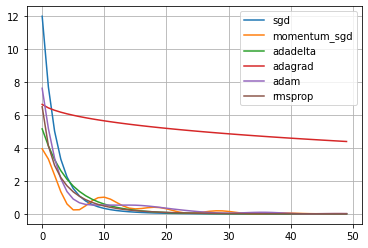

In [0]:
## 最適化関数
loss_dict = {}
loss_dict["sgd"] = []
loss_dict["momentum_sgd"] = []
loss_dict["adadelta"] = []
loss_dict["adagrad"] = []
loss_dict["adam"] = []
loss_dict["rmsprop"] = []

for key, value in loss_dict.items():
  loss_dict[key] = main(key)

plt.figure()
plt.plot(loss_dict["sgd"], label = "sgd")
plt.plot(loss_dict["momentum_sgd"] , label = "momentum_sgd")
plt.plot(loss_dict["adadelta"], label = "adadelta")
plt.plot(loss_dict["adagrad"], label = "adagrad")
plt.plot(loss_dict["adam"], label = "adam")
plt.plot(loss_dict["rmsprop"], label = "rmsprop")
plt.legend()
plt.grid()